In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


In [10]:
import pandas as pd

dataset_path = '/content/drive/MyDrive/housing_dataset.csv'
housing_data = pd.read_csv(dataset_path)


In [14]:
from google.colab import files

# Upload the dataset
uploaded = files.upload()

# Load the dataset
import io
housing_data = pd.read_csv(io.BytesIO(uploaded['housing_dataset.csv']))

# Display basic information about the dataset
housing_data.info()


Saving housing_dataset.csv to housing_dataset (2).csv


KeyError: 'housing_dataset.csv'

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
housing_data = pd.read_csv('housing_dataset.csv')

# Identify categorical columns
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Identify numerical columns
numerical_columns = [col for col in housing_data.columns if col not in categorical_columns and col != 'price']

# Create transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

# Identify the target variable and features
target_column = 'price'
features = housing_data.drop(columns=[target_column])

# Split the dataset into features and target variable
X = features
y = housing_data[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and model training
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply the preprocessing to training and testing sets
X_train_preprocessed = pipeline.fit_transform(X_train)
X_test_preprocessed = pipeline.transform(X_test)

# Display basic information about the preprocessed dataset
print("\nPreprocessed dataset info:")
print(pd.DataFrame(X_train_preprocessed).info())



Preprocessed dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       436 non-null    float64
 1   1       436 non-null    float64
 2   2       436 non-null    float64
 3   3       436 non-null    float64
 4   4       436 non-null    float64
 5   5       436 non-null    float64
 6   6       436 non-null    float64
 7   7       436 non-null    float64
 8   8       436 non-null    float64
 9   9       436 non-null    float64
 10  10      436 non-null    float64
 11  11      436 non-null    float64
 12  12      436 non-null    float64
dtypes: float64(13)
memory usage: 44.4 KB
None


Mean Squared Error (Gradient Descent): 1864228608429.5078


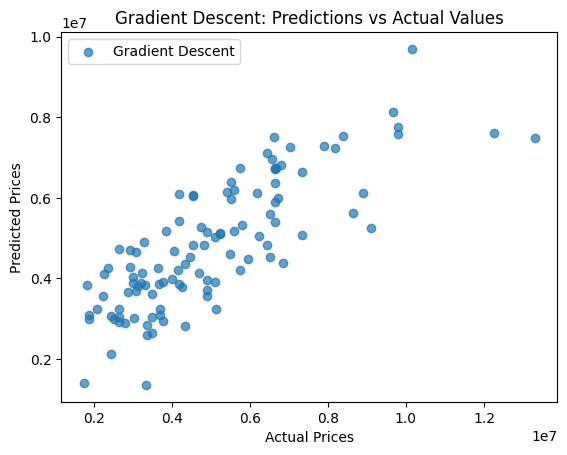

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
dataset_path = 'housing_dataset.csv'
housing_data = pd.read_csv(dataset_path)

# Identify categorical columns
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Identify numerical columns
numerical_columns = [col for col in housing_data.columns if col not in categorical_columns and col != 'price']

# Create transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

# Identify the target variable and features
target_column = 'price'
features = housing_data.drop(columns=[target_column])

# Split the dataset into features and target variable
X = features
y = housing_data[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and model training
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply the preprocessing to training and testing sets
X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)

# Add a column of ones to X for the bias term
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

# Gradient Descent
def gradient_descent(X, y, learning_rate, iterations):
    m, n = X.shape
    theta = np.zeros(n)  # Initialize model parameters to zeros
    cost_history = []

    for _ in range(iterations):
        error = X @ theta - y
        gradient = (1 / m) * (X.T @ error)
        theta -= learning_rate * gradient
        cost = (1 / (2 * m)) * np.sum(error**2)
        cost_history.append(cost)

    return theta, cost_history

# Set hyperparameters for gradient descent
learning_rate = 0.01
iterations = 1000

# Apply gradient descent to get optimal parameters
theta, cost_history = gradient_descent(X_train_scaled, y_train, learning_rate, iterations)

# Make predictions on the test set using the learned parameters
y_pred_gradient_descent = X_test_scaled @ theta

# Evaluate the model
mse_gradient_descent = mean_squared_error(y_test, y_pred_gradient_descent)
print(f"Mean Squared Error (Gradient Descent): {mse_gradient_descent}")

# Visualize predictions vs actual values
plt.scatter(y_test, y_pred_gradient_descent, label='Gradient Descent', alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.title('Gradient Descent: Predictions vs Actual Values')
plt.show()


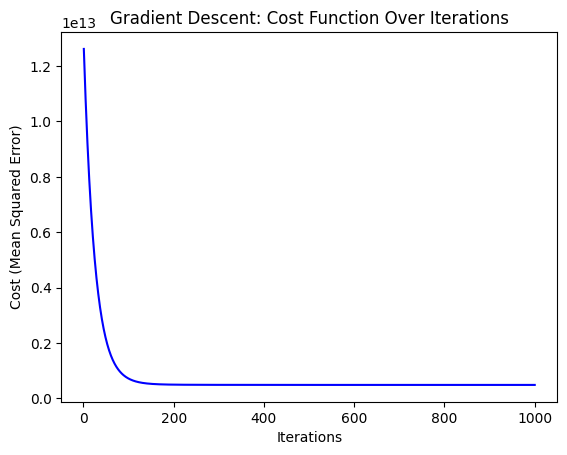

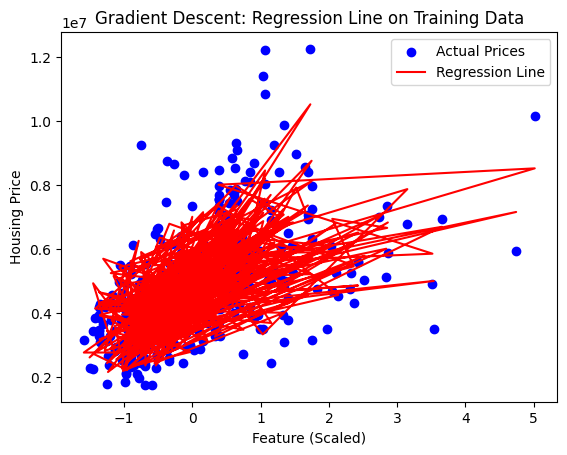

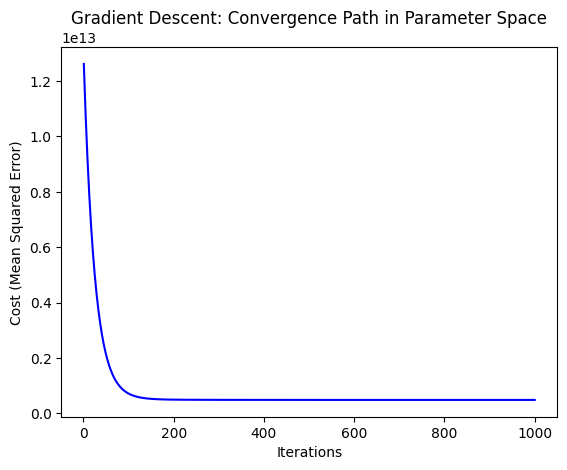

In [44]:


def gradient_descent(X, y, learning_rate, iterations):
    m, n = X.shape
    theta = np.zeros(n)  # Initialize model parameters to zeros
    cost_history = []

    for _ in range(iterations):
        error = X @ theta - y
        gradient = (1 / m) * (X.T @ error)
        theta -= learning_rate * gradient
        cost = (1 / (2 * m)) * np.sum(error**2)
        cost_history.append(cost)

    return theta, cost_history


# Add a column of ones to X for the bias term
X_train_with_bias = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]

# Set hyperparameters for gradient descent
learning_rate = 0.01
iterations = 1000

# Apply gradient descent to get optimal parameters
theta, cost_history = gradient_descent(X_train_with_bias, y_train, learning_rate, iterations)

# Visualization 1: Cost function over iterations
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost (Mean Squared Error)')
plt.title('Gradient Descent: Cost Function Over Iterations')
plt.show()

# Visualization 2: Regression line on the training data
plt.scatter(X_train_scaled[:, 1], y_train, color='blue', label='Actual Prices')
plt.plot(X_train_scaled[:, 1], X_train_with_bias @ theta, color='red', label='Regression Line')
plt.xlabel('Feature (Scaled)')
plt.ylabel('Housing Price')
plt.title('Gradient Descent: Regression Line on Training Data')
plt.legend()
plt.show()

# Visualization 3: Convergence path in parameter space
plt.plot(range(1, iterations + 1), np.array(cost_history), color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost (Mean Squared Error)')
plt.title('Gradient Descent: Convergence Path in Parameter Space')
plt.show()



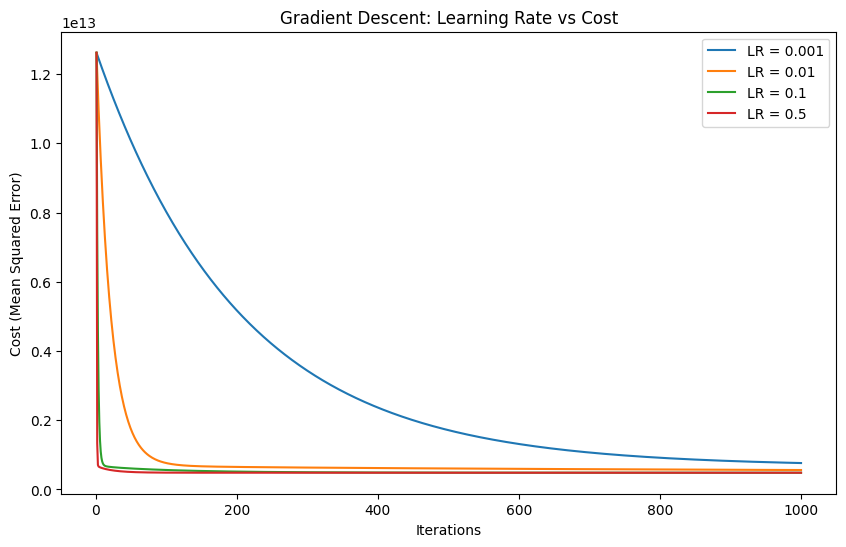

In [27]:
# Visualization 4: Learning Rate vs Cost
learning_rates = [0.001, 0.01, 0.1, 0.5]
cost_history_lr = []

for lr in learning_rates:
    theta, cost_history = gradient_descent(X_train_scaled, y_train, lr, iterations)
    cost_history_lr.append(cost_history)

plt.figure(figsize=(10, 6))
for i in range(len(learning_rates)):
    plt.plot(range(1, iterations + 1), cost_history_lr[i], label=f'LR = {learning_rates[i]}')

plt.xlabel('Iterations')
plt.ylabel('Cost (Mean Squared Error)')
plt.title('Gradient Descent: Learning Rate vs Cost')
plt.legend()
plt.show()


# LEARNING CURVE
Plotting the training and validation error as a function of the training set size or training iteration. This helps understand how well the model is learning over time.

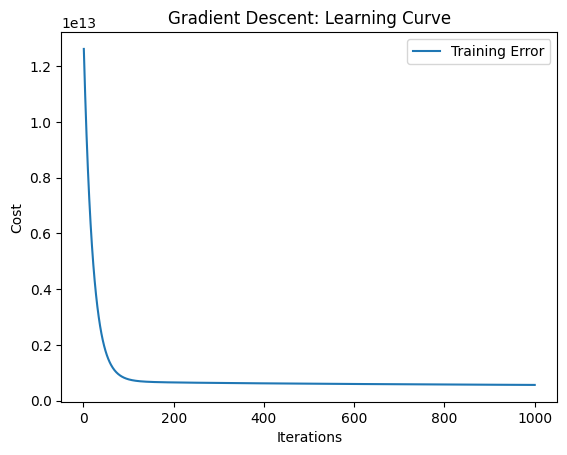

In [36]:

plt.plot(range(1, iterations + 1), cost_history, label='Training Error')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent: Learning Curve')
plt.legend()
plt.show()


# Residual Plot:
Visualizing the residuals (the differences between actual and predicted values). A scatter plot of residuals against predicted values can provide insights into the model's performance.

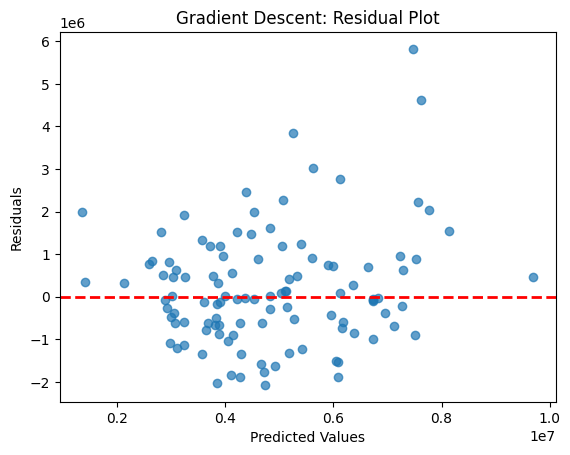

In [37]:
residuals = y_test - y_pred_gradient_descent
plt.scatter(y_pred_gradient_descent, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Gradient Descent: Residual Plot')
plt.show()


# Learning Rate Impact
Plot the cost function over iterations for different learning rates. This helps you choose an appropriate learning rate.

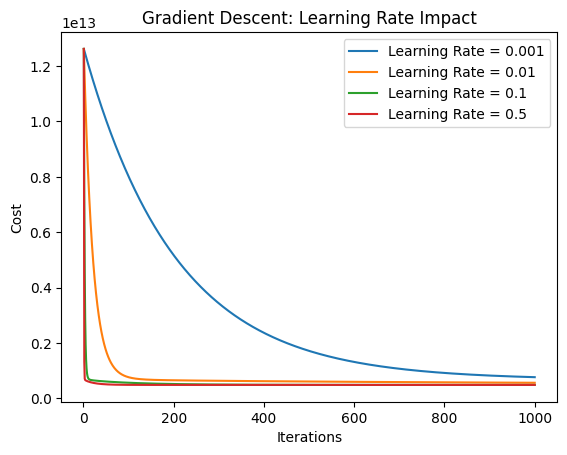

In [39]:
learning_rates = [0.001, 0.01, 0.1, 0.5]
for lr in learning_rates:
    _, cost_history_lr = gradient_descent(X_train_scaled, y_train, lr, iterations)
    plt.plot(range(1, iterations + 1), cost_history_lr, label=f'Learning Rate = {lr}')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent: Learning Rate Impact')
plt.legend()
plt.show()


# Regularization and Ridge Regression

Mean Squared Error (Ridge Regression): 2102304194536.5283


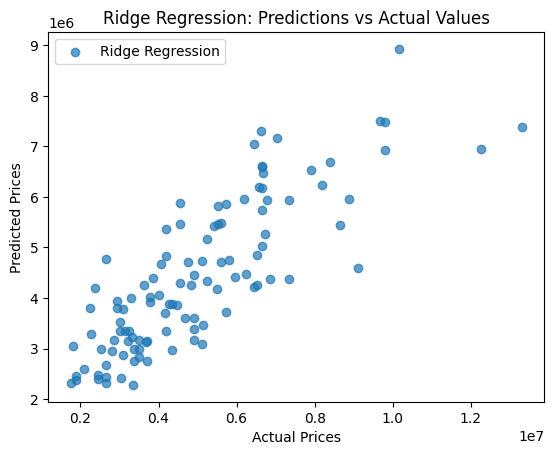

In [43]:


# Data preprocessing
# Handle categorical variables using one-hot encoding
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a column of ones to X for the bias term
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]


# Ridge Regression with Gradient Descent
def ridge_regression(X, y, learning_rate, iterations, alpha):
    m, n = X.shape
    theta = np.zeros(n)  # Initialize model parameters to zeros
    cost_history = []

    for _ in range(iterations):
        error = X @ theta - y
        gradient = (1 / m) * (X.T @ error) + alpha * theta  # Regularization term
        theta -= learning_rate * gradient
        cost = (1 / (2 * m)) * np.sum(error**2) + (alpha / (2 * m)) * np.sum(theta**2)  # Regularization term
        cost_history.append(cost)

    return theta, cost_history

# Set hyperparameters for ridge regression
learning_rate = 0.01
iterations = 1000
alpha = 0.1  # Regularization parameter

# Apply ridge regression to get optimal parameters
theta_ridge, cost_history_ridge = ridge_regression(X_train_scaled, y_train, learning_rate, iterations, alpha)

# Make predictions on the test set using the learned parameters
y_pred_ridge = X_test_scaled @ theta_ridge

# Evaluate the ridge regression model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Mean Squared Error (Ridge Regression): {mse_ridge}")

# Visualize predictions vs actual values
plt.scatter(y_test, y_pred_ridge, label='Ridge Regression', alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.title('Ridge Regression: Predictions vs Actual Values')
plt.show()
